In [3]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [4]:
# Fetch the MNIST dataset:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [5]:
mnist.data.shape

(70000, 784)

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [30]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [31]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

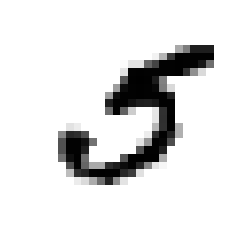

In [24]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
####buscar flask para hacer lo del servidor

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors" : [5,10]}     

KNN=KNeighborsClassifier()

grid=GridSearchCV(KNN, param_grid = param_grid , cv = 4,n_jobs=2 ,scoring = 'accuracy', return_train_score = True)
grid.fit(X,y)

KeyboardInterrupt: 

In [ ]:
###De aqui vas agregar el segundo punto alfredo
print(grid.grid_scores_)

In [32]:
import copy
import math
import matplotlib
import matplotlib.pyplot as plt

def transformar_digito(grado, dimension, digito_original):
    #Hacer una copia de la imagen original para no alterarla
    digito_rotado = copy.deepcopy(digito_original)
    
    #Dimensiones de la imagen
    ancho = dimension
    alto = dimension
    
    #Variables de la formula de rotación
    angulo = float(math.radians(grado))
    sin = float(math.sin(angulo))
    cos = float(math.cos(angulo))
    x0 = float(0.5 * (ancho  - 1))
    y0 = float(0.5 * (alto - 1))
    
    #Rotación
    for x in range(0, ancho):
        for y in range(0, alto):
            a = float(x - x0)
            b = float(y - y0)
            xx = int(+a * cos - b * sin + x0)
            yy = int(+a * sin + b * cos + y0)

            if(xx >= 0 and xx < ancho and yy >= 0 and yy < alto):
                digito_rotado[x][y] = digito_original[xx][yy]
                
    return digito_rotado.reshape(784)

In [33]:
import matplotlib
import matplotlib.pyplot as plt
##X_train, y_train 
X_copytrain = copy.deepcopy(X_train) 
y_copytrain = copy.deepcopy(y_train) 
## esto no sirve t pasas la dvd X_copytrainimage =X_copytrain.reshape(28, 28)
##imagenesenVector
X_copytrainV = []
y_copytrainV = []
##li2 = copy.deepcopy(y_train) 
rotacion=0
for j in range(0,len(X_copytrain) ):##len(X_copytrain)
    rotacion=0
    for i in range(0, 4):
       
        X_copytrainV.append( transformar_digito(rotacion,28,X_copytrain[j].reshape(28, 28)))
        y_copytrainV.append(y_copytrain[j])
        rotacion+=90
        ##plt.imshow(X_copytrainV[i], cmap=matplotlib.cm.binary, interpolation="nearest")
        ##plt.axis("off")
        ##plt.show()
        ##X_copytrainV.append(rotar_digito(rotacion,28,X_copytrainimage[j]))
        ##y_copytrain[j]=

        ##Mostramos 4 numero para ver que si funciono
##for i in range(0, 4):   
##    plt.imshow(X_copytrainV[i], cmap=matplotlib.cm.binary, interpolation="nearest")
##    plt.axis("off")
##    plt.show()

In [ ]:
##for i in range(0, 4):   
##    plt.imshow(X_copytrainV[i].reshape(28,28), cmap=matplotlib.cm.binary, interpolation="nearest")
####    print(y_copytrainV[i])
 ##   plt.axis("off")
##    plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors" : [5,10]}     

KNN=KNeighborsClassifier()

grid=GridSearchCV(KNN, param_grid = param_grid , cv = 2,n_jobs=1 ,scoring = 'accuracy', return_train_score = True)
grid.fit(X_copytrainV,y_copytrainV)
print(grid.grid_scores_)